# Explore here

In [2]:
# Your code here
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
data.info()
data_uniques = data.drop_duplicates()
print(data_uniques.shape)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
data_uniques.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
col = ["age","duration","campaign","emp.var.rate"]
def eliminar_atipicos(datos, columnas):
    new_data = datos
    for i in columnas:
        q1=new_data[i].quantile(0.25)
        q3=new_data[i].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        hi_lim = q3 + 1.5*iqr
        print(f"\nq1:{q1} q3:{q3} iqr:{iqr}")

        rem = new_data[(new_data[i]>=hi_lim) | (new_data[i]< low_lim)]
        print(f"Outliers en '{i}': {len(rem)} encontrados.{hi_lim} {low_lim}")
        new_data = new_data.drop(index=rem.index)
    return new_data.copy()

data_filter = eliminar_atipicos(data_uniques,col)
data_filter.describe()


q1:32.0 q3:47.0 iqr:15.0
Outliers en 'age': 468 encontrados.69.5 9.5

q1:102.0 q3:319.0 iqr:217.0
Outliers en 'duration': 2935 encontrados.644.5 -223.5

q1:1.0 q3:3.0 iqr:2.0
Outliers en 'campaign': 3150 encontrados.6.0 -2.0

q1:-1.8 q3:1.4 iqr:3.2
Outliers en 'emp.var.rate': 0 encontrados.6.200000000000001 -6.6000000000000005


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000,34623.000000
mean,39.588106,207.791035,1.941253,963.120989,0.176212,0.058233,93.564371,-40.508613,3.603735,5166.373604
std,9.686259,139.918024,1.128871,185.315871,0.495020,1.569048,0.577211,4.635703,1.732782,71.647984
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,171.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,282.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,644.000000,5.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: >

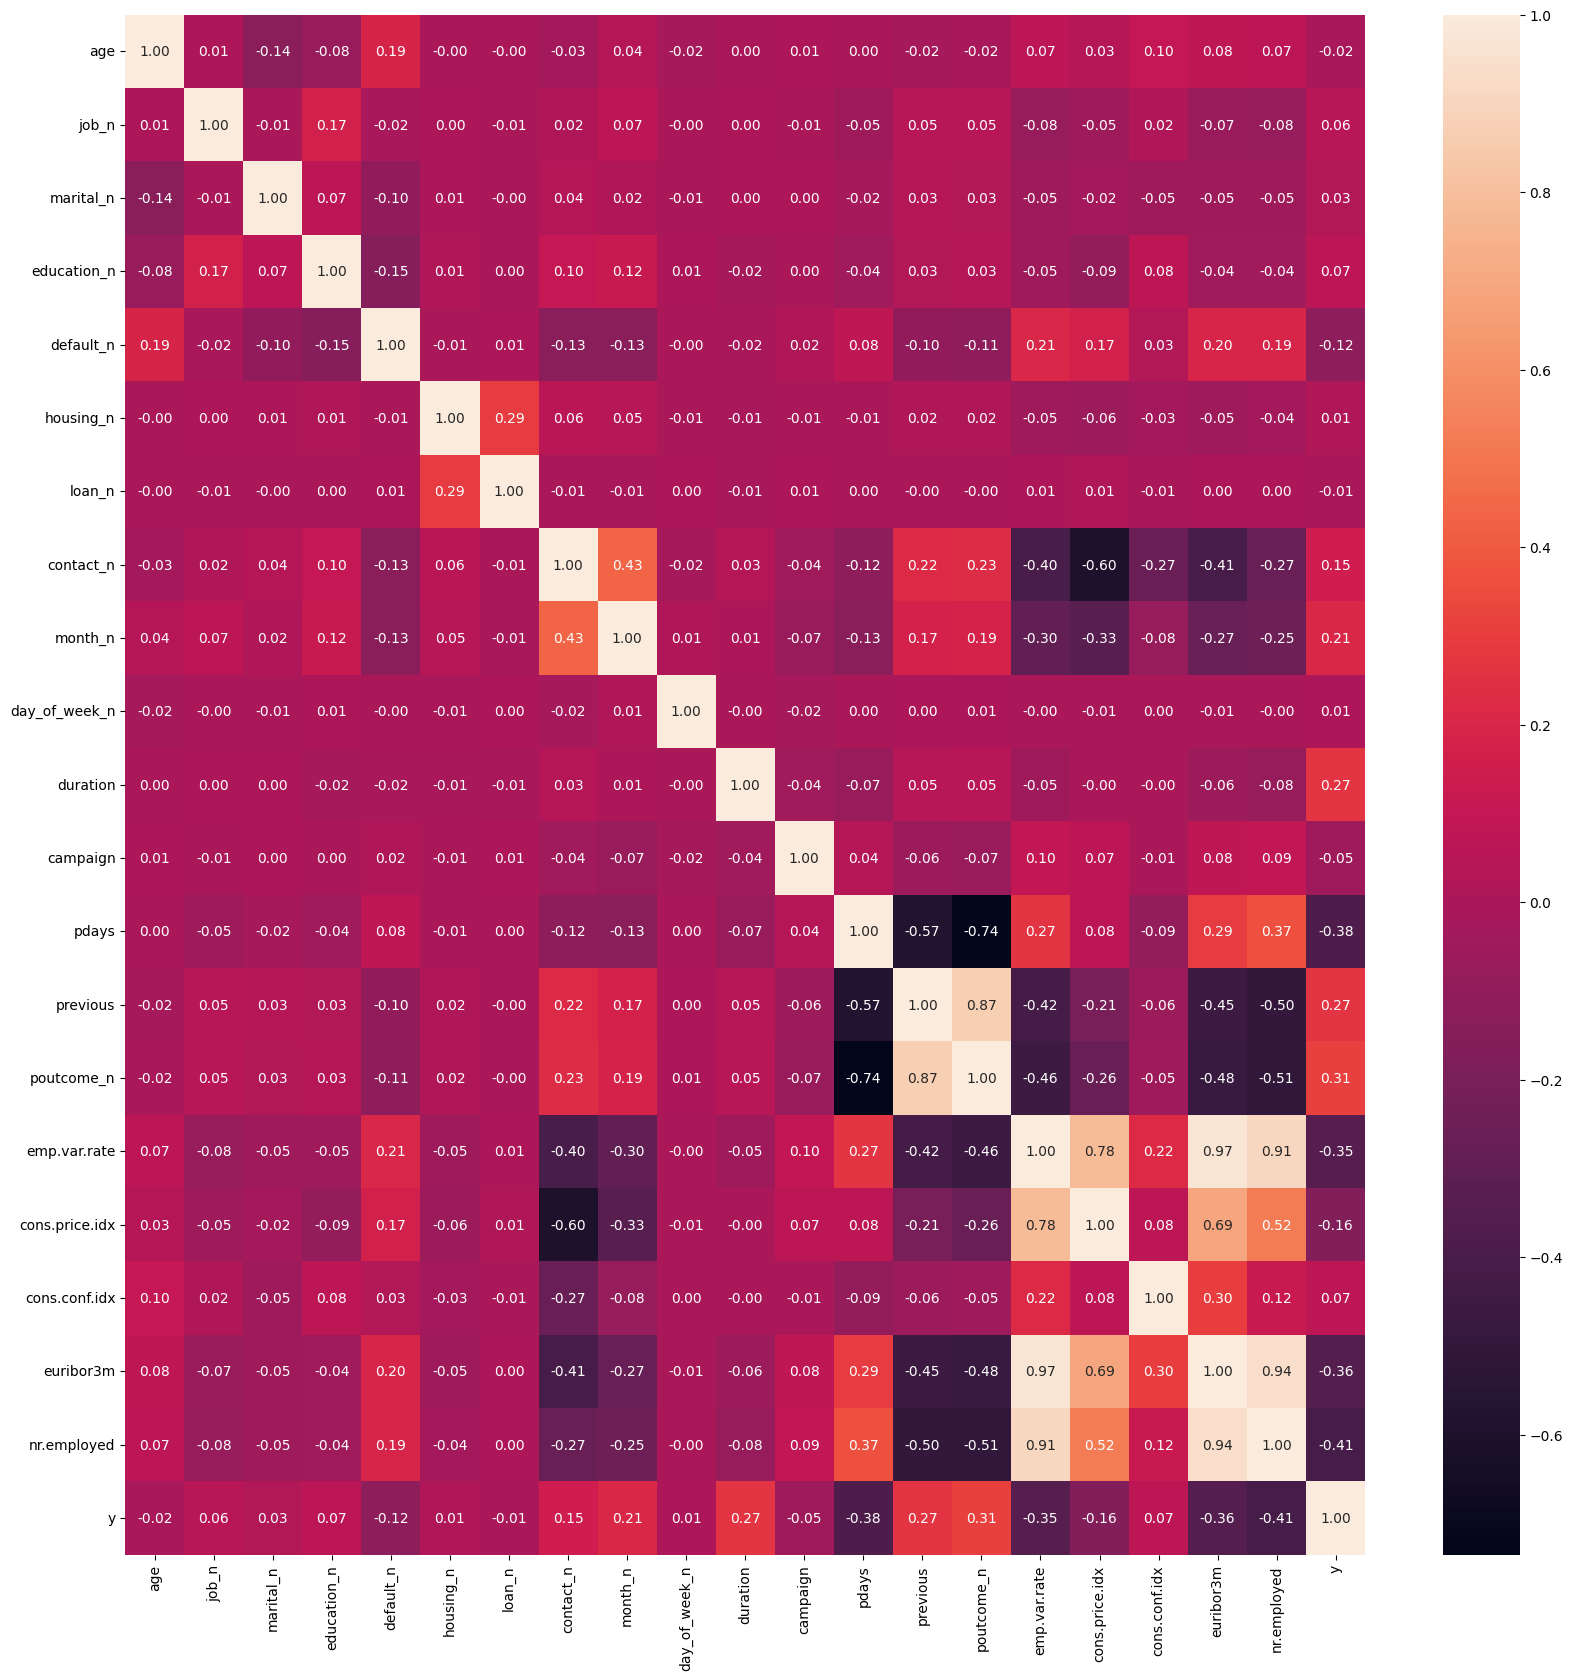

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(figsize = (20,20))
data_filter['job_n']=pd.factorize(data_filter["job"])[0]
data_filter['marital_n']=pd.factorize(data_filter["marital"])[0]
data_filter['education_n']=pd.factorize(data_filter["education"])[0]
data_filter['default_n']=pd.factorize(data_filter["default"])[0]
data_filter['housing_n']=pd.factorize(data_filter["housing"])[0]
data_filter['loan_n']=pd.factorize(data_filter["loan"])[0]
data_filter['contact_n']=pd.factorize(data_filter["contact"])[0]
data_filter['month_n']=pd.factorize(data_filter["month"])[0]
data_filter['day_of_week_n']=pd.factorize(data_filter["day_of_week"])[0]
data_filter['poutcome_n']=pd.factorize(data_filter["poutcome"])[0]
data_filter['y']=pd.factorize(data_filter["y"])[0]
t_col = ['age', 'job_n', 'marital_n', 'education_n', 'default_n', 'housing_n', 'loan_n',
       'contact_n', 'month_n', 'day_of_week_n', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome_n', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','y']

sns.heatmap(data_filter[t_col].corr(), annot = True, fmt = ".2f")


col = ["pdays", "emp.var.rate","eurobor3m", "nr.eployed", "y"]

In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

col = ["pdays", "emp.var.rate","euribor3m", "nr.employed", "y"]
scaler = StandardScaler()
norm_features = scaler.fit_transform(data_filter[col])
data_scal = pd.DataFrame(norm_features, index = data_filter.index, columns = col)
data_scal["y"] = data_filter["y"]

X = data_scal.drop("y",axis=1)
Y = data_scal["y"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)



In [9]:
x_train.to_csv("../data/processed/x_train.csv", index=False)
x_test.to_csv("../data/processed/x_test.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

grid_accuracy = accuracy_score(y_test, y_pred)
print(grid_accuracy)

0.9276534296028881
